In [6]:
import color as color
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from db.mysql import Engine

db_conn = Engine.get_db_conn()
yelp_global_restaurant = pd.read_sql('yelp_cleaned', db_conn)
# yelp_global_restaurant = pd.read_csv('./yelp_cleaned.csv')

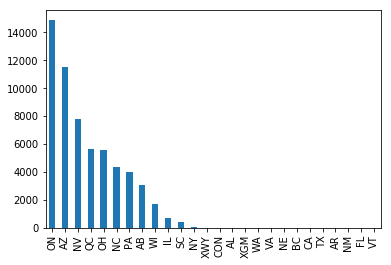

In [10]:
yelp_global_restaurant['state'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

yelp_us_restaurants = yelp_global_restaurant.loc[yelp_global_restaurant['state'].isin(states)]

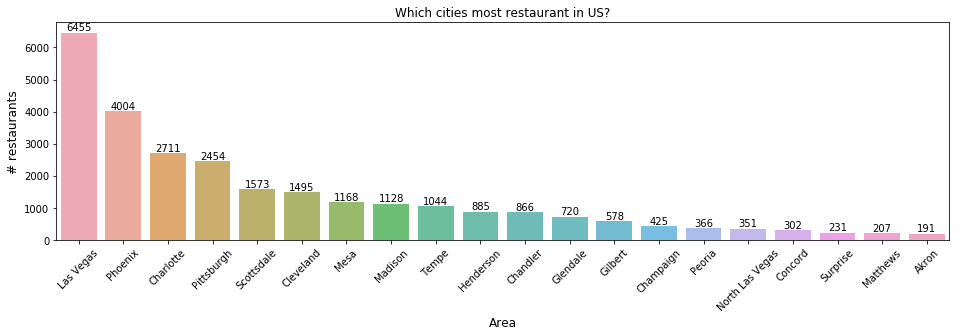

In [7]:
x=yelp_us_restaurants['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Which cities most restaurant in US?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# restaurants', fontsize=12)
plt.xlabel('Area', fontsize=12)

# adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

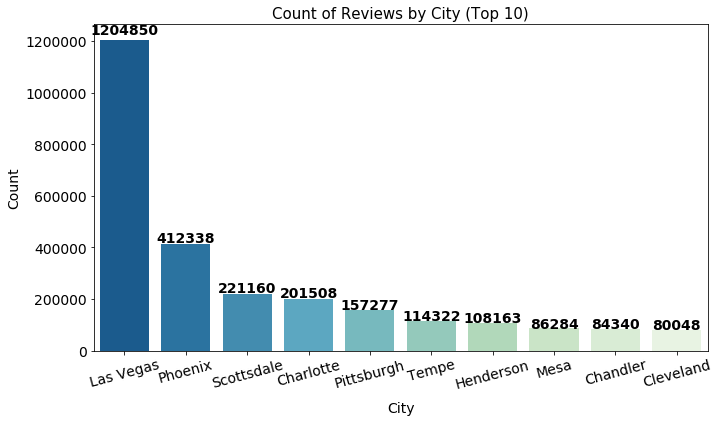

In [8]:
plt.figure(figsize=(11,6))
grouped = yelp_us_restaurants.groupby('city')['review_count'].sum().sort_values(ascending=False)[:10]
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)) )
plt.xlabel('City', labelpad=10, fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Reviews by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)
    

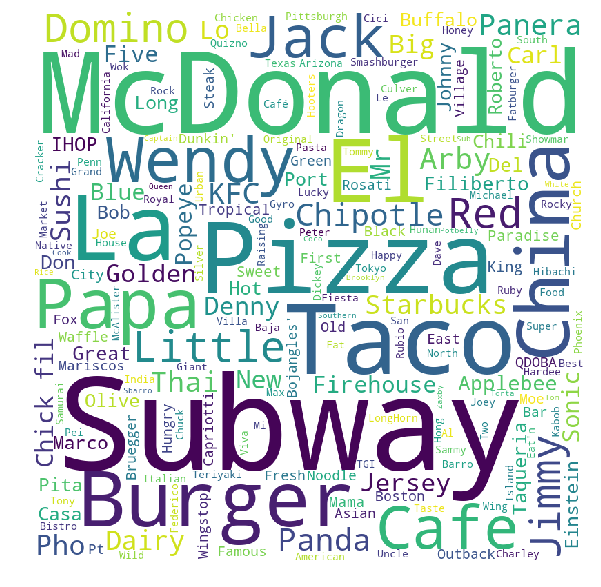

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

restaurant_tokens = yelp_us_restaurants['name'].str.split()
restaurant_text = ' '.join(word[0] for word in restaurant_tokens.values)
word_cloud = WordCloud(width = 800, height = 800, background_color ='white')\
    .generate(restaurant_text)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
